

## The Problem

How to increase employee satisfaction?  Employee satisfaction is critical in gaining and retaining talent.  Based on HR data, there appears to be a correlation between employee satisfaction and hours worked.



## The Potential Solution

Limiting employee hours to 40 should increase employee satisfaction.  


## The Method of Testing the Solution 

Random employees from each department will be selected to have their hours capped at 40 for an entire quarter. The number of capped vs uncapped will be evenly divided among the departments.  Department managers will be responsible for enforcing the cap.  Login and logout times along with timesheet information will be tracked to confirm the cap has is being enforced. Employee satisfaction surveys will be taken before the quarter and after the quarter. 

Compare satisfaction levels vs productivity (number of projects completed).  If after one quarter satisfaction levels do not increase by 10%, discontinue the cap.  If productivity falls more than 30%, discontinue the cap and consider the viability of other options like hiring more employees.   





In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import Counter
import scipy as scipy
from scipy.stats import ttest_ind

df = pd.read_csv('HR_comma_sep.csv')

In [2]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


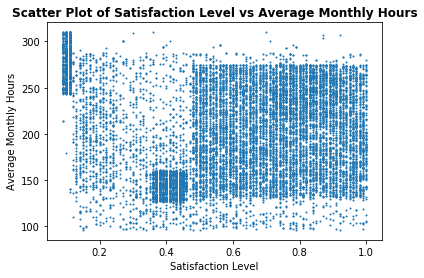

In [4]:
plt.scatter(x=df['satisfaction_level'], y=df['average_montly_hours'], s=1)
plt.title('Scatter Plot of Satisfaction Level vs Average Monthly Hours', fontsize=12, fontweight='bold')
plt.ylabel('Average Monthly Hours')
plt.xlabel ('Satisfaction Level')
plt.show()

In comparing employee satisfaction with average monthly hours we found that working bove 225 average monthy hours correlates to very low satisfaction.  There is also a large group of employees with low satisfaction rating that worked 125 to 155 average monthly hours.

In comparing employee satisfaction with average monthly hours we found that working bove 225 average monthy hours correlates to very low satisfaction. There is also a large group of employees with low satisfaction rating that worked 125 to 155 average monthly hours.

Next we will compare salary level (low, medium or high) with average employee satisfaction. Before we do though we must determine if we can reject the null hypothesis (i.e. determine if there is a relationship betwee the salary level and average employee satisfaction). In order to do that we need to see if our data has a normal distribution.

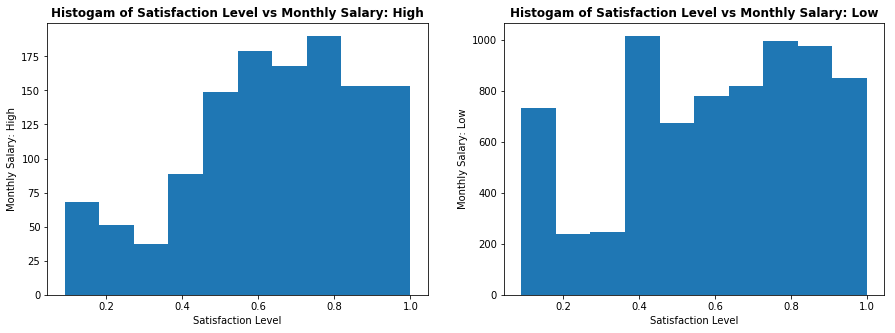

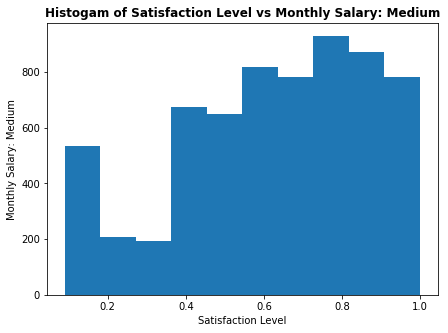

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['salary'] == 'high'].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Monthly Salary: High', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Salary: High')
plt.xlabel ('Satisfaction Level')
plt.subplot(1, 2, 2)
plt.hist(df[df['salary'] == 'low'].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Monthly Salary: Low', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Salary: Low')
plt.xlabel ('Satisfaction Level')
plt.show()
plt.figure(figsize=(7, 5))
plt.hist(df[df['salary'] == 'medium'].satisfaction_level)
plt.title('Histogam of Satisfaction Level vs Monthly Salary: Medium', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Salary: Medium')
plt.xlabel ('Satisfaction Level')
plt.show()

The histograms reveal that the data is not normally distributed. In order to reject the null hypothesis we must run the Mann-Whitney test. We do that below.

In [6]:
ptest = scipy.stats.mannwhitneyu(df[df['salary'] == 'high'].satisfaction_level, 
                                 df[df['salary'] == 'medium'].satisfaction_level).pvalue

print ('high vs medium:',ptest)
ptest = scipy.stats.mannwhitneyu(df[df['salary'] == 'high'].satisfaction_level, 
                                 df[df['salary'] == 'low'].satisfaction_level).pvalue

print ('high vs low:', ptest)
ptest = scipy.stats.mannwhitneyu(df[df['salary'] == 'medium'].satisfaction_level, 
                                 df[df['salary'] == 'low'].satisfaction_level).pvalue
print ('medium vs low:', ptest)

high vs medium: 0.0643467316007
high vs low: 1.31173657022e-05
medium vs low: 1.85378640434e-06


We have three values to compare against each other so we ran the Mann-Whitney test for each comparison. The findings show that we can compare the satisfaction levels of employees with high salaries with employees with low salaries with a high level of accuracy. We can do the same for employees with medium salaries and low salaries. However we can not compare the average satisfaction levels of employees with high salaries agains the averave satisfaction levels of employees with medium salaries with a high level of accuracy.

/Users/christophersmyth/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


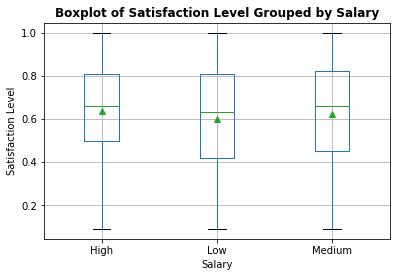

In [8]:
df.boxplot(
    column='satisfaction_level', 
    by='salary',
    showmeans=True
)
plt.title('Boxplot of Satisfaction Level Grouped by Salary', fontsize=12, fontweight='bold')
plt.suptitle("")
plt.ylabel ('Satisfaction Level')
plt.xlabel ('Salary')
plt.xticks([1, 2, 3], ['High', 'Low', 'Medium'])
plt.show()

The box plot above shows the average satisfaction levels grouped by Salary. We expected high salary to coorelate to high satisfaction. What we find is that there is very little different in employee satisfaction between those employees that make a high salary vs those that make a low salary. We also find that there is very little difference in employee satisfaction ratings between employees that make a medium level salary and those that make a low salary. While employees that make a low salary have the lowest satisfaction level, it is not significantly lower than employees who make a high or medium salary level.  

Since salary is not a factor in satisfaction level it may be an area that could adjusted to allow for the hiring of more resources if capping hours has a significant inpact on productivity.